Classification based on KMeans_Cluster:

Support Vector Machine (SVM) Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1192
           1       1.00      0.99      0.99       638
           2       1.00      0.99      0.99       279

    accuracy                           0.99      2109
   macro avg       1.00      0.99      0.99      2109
weighted avg       0.99      0.99      0.99      2109

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1192
           1       0.99      0.98      0.99       638
           2       0.98      0.98      0.98       279

    accuracy                           0.99      2109
   macro avg       0.99      0.99      0.99      2109
weighted avg       0.99      0.99      0.99      2109



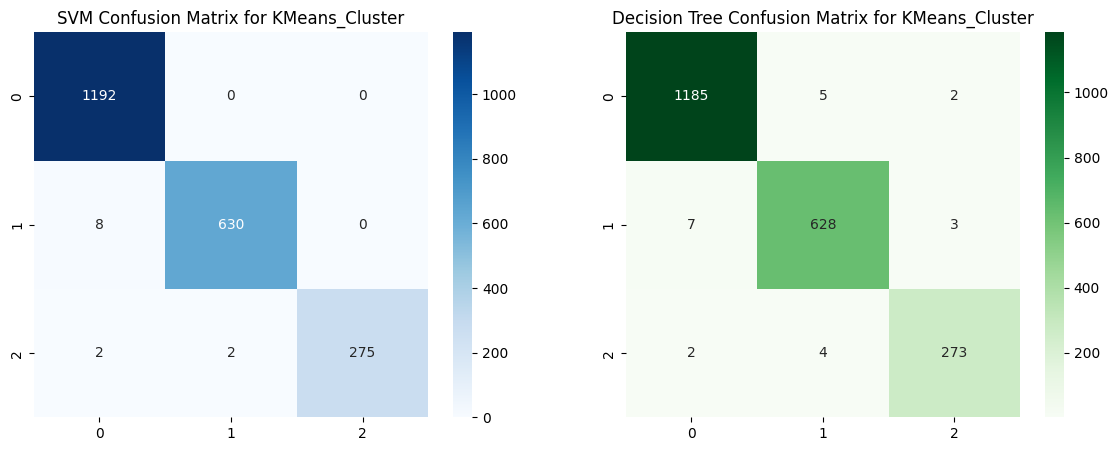

Classification based on Hierarchical_Cluster:

Support Vector Machine (SVM) Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       745
           1       0.97      0.97      0.97       943
           2       0.95      0.93      0.94       421

    accuracy                           0.95      2109
   macro avg       0.95      0.94      0.95      2109
weighted avg       0.95      0.95      0.95      2109

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       745
           1       0.99      0.99      0.99       943
           2       0.97      0.97      0.97       421

    accuracy                           0.98      2109
   macro avg       0.98      0.98      0.98      2109
weighted avg       0.98      0.98      0.98      2109



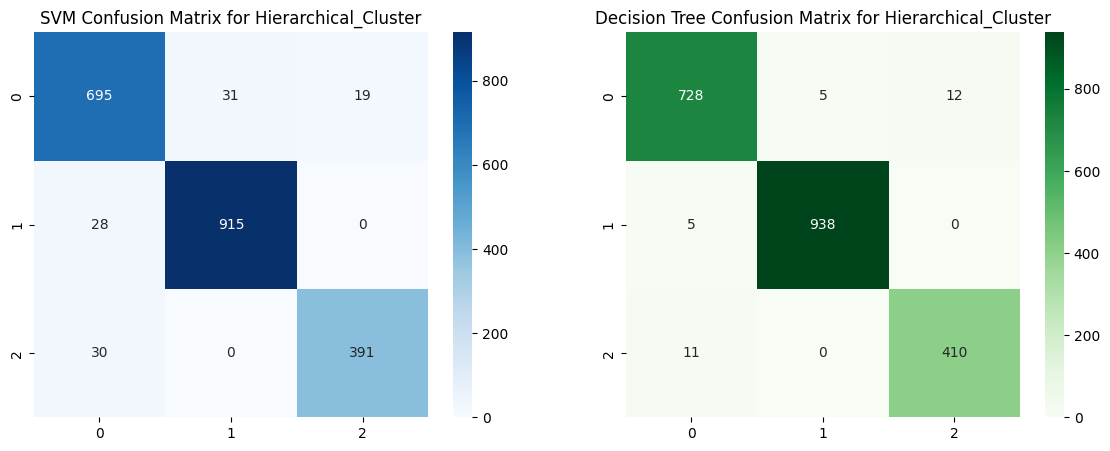

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv(r'C:\Users\asus\Desktop\Assignment\Second Assignment\Preprocessed_with_clusters.csv')

# List of clustering labels to use for classification
cluster_labels = ['KMeans_Cluster', 'Hierarchical_Cluster']

for label in cluster_labels:
    print(f"Classification based on {label}:\n")

    # Assuming 'label' is the target variable for classification
    X = data[['Gross Domestic Product (GDP)', 'Gross National Income(GNI) in USD', 'Trade Balance', 'Sectoral Output']]
    y = data[label]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create and train the SVM classifier
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(X_train, y_train)

    # Create and train the Decision Tree classifier
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train)

    # Make predictions with both classifiers
    y_pred_svm = svm_classifier.predict(X_test)
    y_pred_dt = dt_classifier.predict(X_test)

    # Evaluate the SVM classifier
    print("Support Vector Machine (SVM) Classification Report:")
    print(classification_report(y_test, y_pred_svm))

    # Evaluate the Decision Tree classifier
    print("Decision Tree Classification Report:")
    print(classification_report(y_test, y_pred_dt))

    # Plotting the confusion matrices for both classifiers
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Confusion matrix for SVM
    sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', ax=axes[0], cmap='Blues')
    axes[0].set_title(f'SVM Confusion Matrix for {label}')

    # Confusion matrix for Decision Tree
    sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=axes[1], cmap='Greens')
    axes[1].set_title(f'Decision Tree Confusion Matrix for {label}')

    plt.show()
